In [24]:
print(__doc__)


Automatically created module for IPython interactive environment


In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [26]:
df = pd.read_csv('./04cars-data.csv', header = 0)

In [27]:
original_headers = list(df.columns.values)

In [28]:
print(original_headers)

['Vehicle Name', 'Small/Sporty/ Compact/Large Sedan', 'Sports Car', 'SUV', 'Wagon', 'Minivan', 'Pickup', 'AWD', 'RWD', 'Retail Price', 'Dealer Cost', 'Engine Size (l)', 'Cyl', 'HP', 'City MPG', 'Hwy MPG', 'Weight', 'Wheel Base', 'Len', 'Width']


In [29]:
df

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,1,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,1,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,0,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,0,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [30]:
df.size

7740

In [31]:
df.shape

(387, 20)

In [32]:
dff = df._get_numeric_data()

In [33]:
df.shape

(387, 20)

In [34]:
data = df.iloc[:,9:]

In [35]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)

In [36]:
data_scaled.mean(axis=0)

array([-4.13106242e-17,  4.13106242e-17, -6.05889155e-16, -1.00981526e-16,
       -1.79012705e-16, -4.59006935e-18, -7.57361443e-17, -2.06553121e-16,
        7.89491929e-16, -6.70150125e-16,  1.78094691e-15])

In [37]:
data_scaled.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
array = data_scaled

In [39]:
array.shape

(387, 11)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA()

In [42]:
X_pca = pca.fit_transform(array)
X_pca.shape

(387, 11)

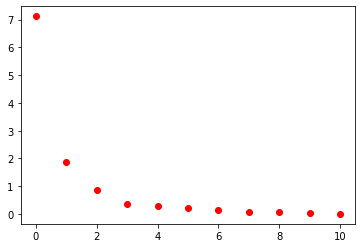

In [43]:
variance = pca.explained_variance_
plt.plot(variance, 'ro')
plt.show()

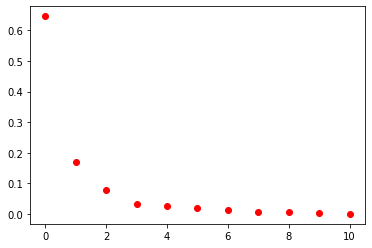

0.8171421089701892
0.8943901348942341


In [44]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:2]))
print(sum(variance_ratio[0:3]))

In [45]:
attributes = df.columns.values[9:]
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ":" + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.26375044344403425:0.46850869750253876
Dealer Cost:-0.26231863875309525:0.4701465851382257
Engine Size (l):-0.34708049202520086:-0.01534718646371358
Cyl:-0.3341887576286371:0.07803201087501868
HP:-0.31860225848402923:0.292213476139182
City MPG:0.3104817267323128:-0.003365935761659125
Hwy MPG:0.30658863858044433:-0.010964460145348687
Weight:-0.3363293669404879:-0.1674635715478704
Wheel Base:-0.26621003357105416:-0.4181771069592041
Len:-0.2567901876706822:-0.40841138066875465
Width:-0.29605459141706103:-0.312891350162507


In [46]:
k = 3
attributes = df.columns.values[9:]
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc1[sorted[i]]))
pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc2[sorted[i]]))

----------PC1-------------
Engine Size (l):-0.34708049202520086
Weight:-0.3363293669404879
Cyl:-0.3341887576286371
--------------------------
City MPG:0.3104817267323128
Hwy MPG:0.30658863858044433
Len:-0.2567901876706822
----------PC2-------------
Wheel Base:-0.4181771069592041
Len:-0.40841138066875465
Width:-0.312891350162507
--------------------------
Dealer Cost:0.4701465851382257
Retail Price:0.46850869750253876
HP:0.292213476139182


In [47]:
x = X_pca[:,0]
y = X_pca[:,1]

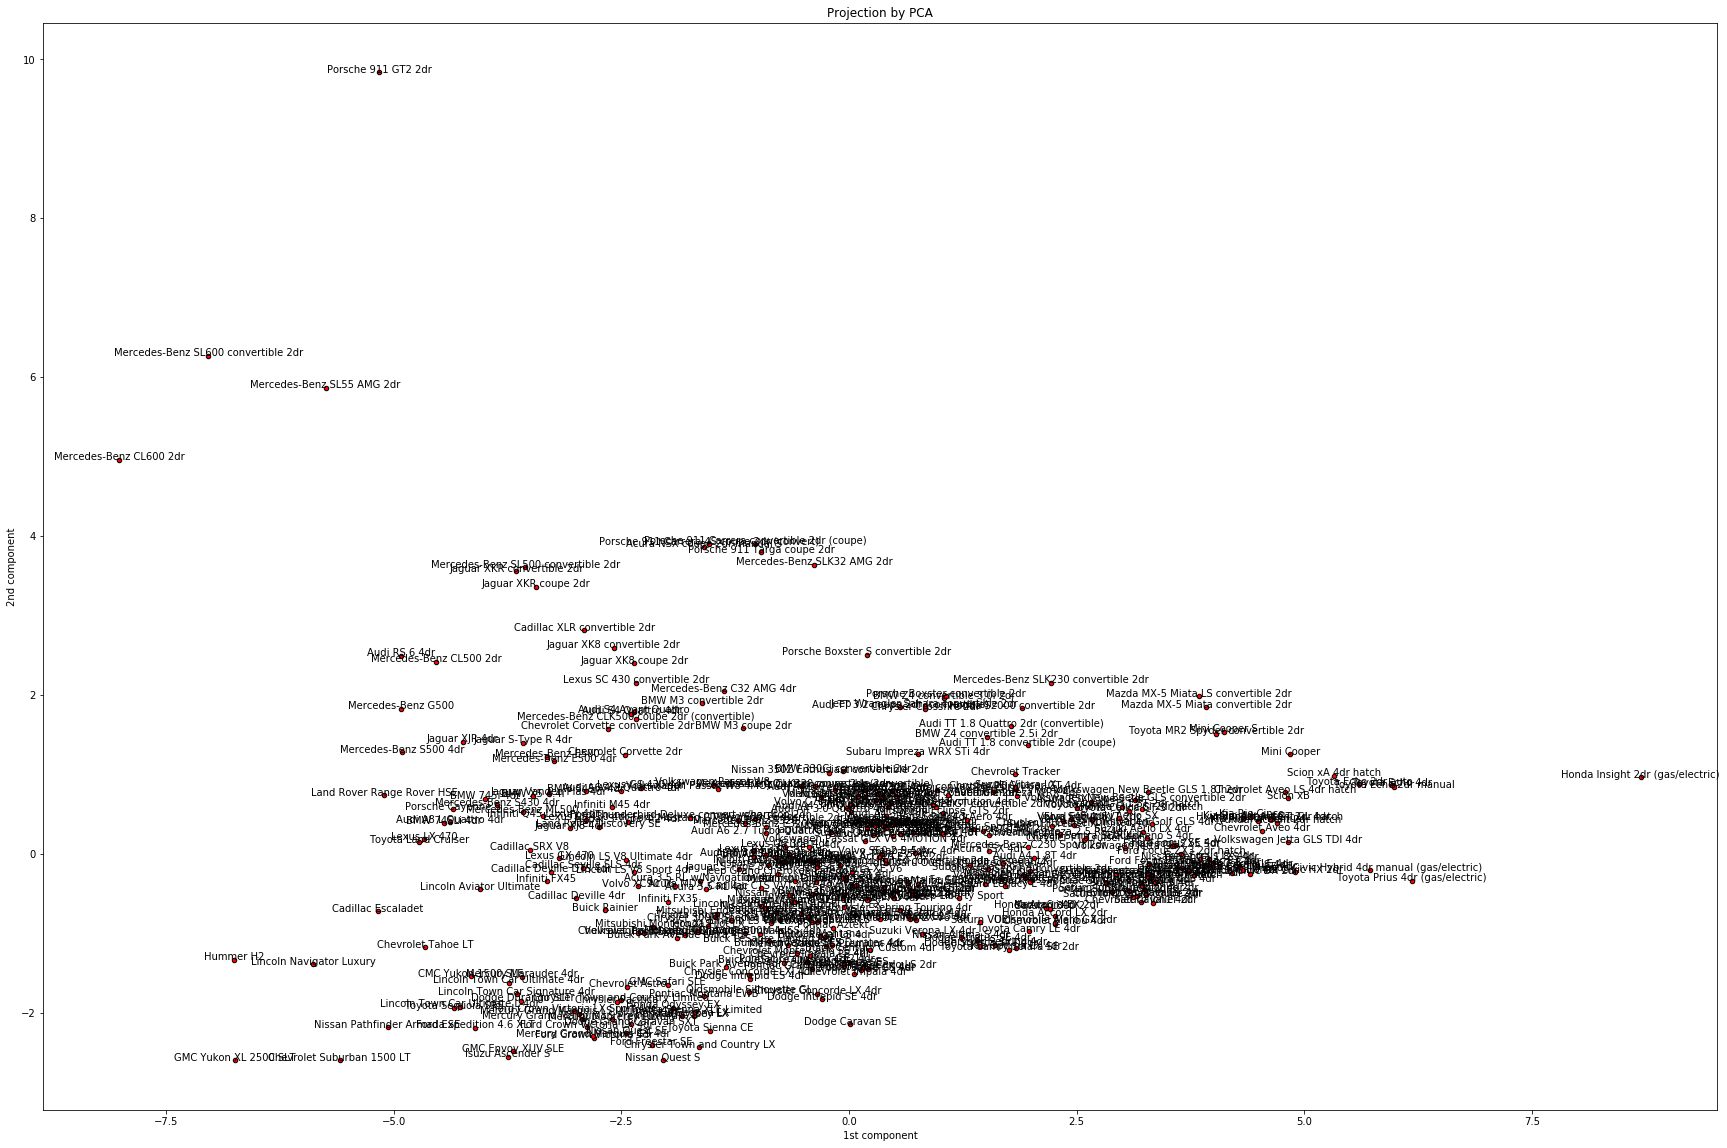

In [48]:
plt.figure(figsize=(30, 20))
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
labels = list(df.iloc[:,0])
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]), ha="center")

plt.show()

[[-0.26375044 -0.26231864 -0.34708049 -0.33418876 -0.31860226  0.31048173
   0.30658864 -0.33632937 -0.26621003 -0.25679019 -0.29605459]
 [ 0.4685087   0.47014659 -0.01534719  0.07803201  0.29221348 -0.00336594
  -0.01096446 -0.16746357 -0.41817711 -0.40841138 -0.31289135]]


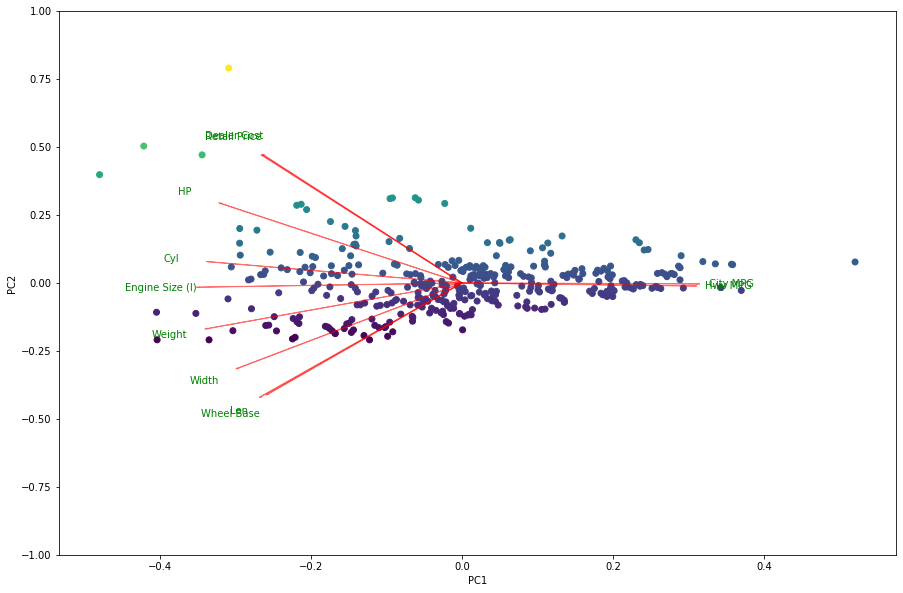

In [49]:
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(15,10))
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

print(pca.components_[0:2, :])
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]),attributes)
axes = plt.gca()
axes.set_ylim([-1.0,1.0])
plt.show()